### 4.10 Part 1.2-2
#### -analyzing the customers to define which flag is more efficient 
#### -creating the AgeIncome_flag
#### - merging flag with df

### 1 Importing libraries and df w/o PII

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [19]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

In [20]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','sample_revenue.pkl'))

In [21]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag'],
      dtype='object')

In [22]:
df.shape

(31156122, 30)

In [23]:
df[['user_id','Age', 'income','product_id', 'order_number','mean_price']] .describe()

,user_id,Age,income,product_id,order_number,mean_price
count,3.115612e+07,3.115612e+07,3.115612e+07,3.115612e+07,3.115612e+07,3.115612e+07
mean,1.029291e+05,4.946819e+01,9.965268e+04,2.544263e+04,1.784422e+01,1.193667e+01
std,5.947130e+04,1.848516e+01,4.313888e+04,1.417704e+04,1.763326e+01,8.001784e+01
min,1.000000e+00,1.800000e+01,2.590300e+04,0.000000e+00,1.000000e+00,1.000000e+00
25%,5.140900e+04,3.300000e+01,6.727000e+04,1.324900e+04,5.000000e+00,7.397610e+00
50%,1.025860e+05,4.900000e+01,9.674800e+04,2.510400e+04,1.200000e+01,7.829827e+00
75%,1.543890e+05,6.500000e+01,1.280820e+05,3.776600e+04,2.500000e+01,8.253762e+00
max,2.062090e+05,8.100000e+01,5.939010e+05,4.968800e+04,1.000000e+02,1.500694e+04


### 5 - Analyzing Young   Advanced Consumer by Busiest_day

In [24]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

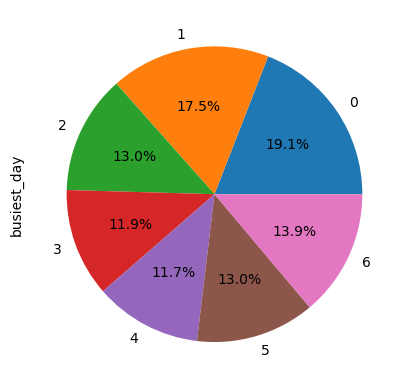

In [25]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [26]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    5948348
1    5440943
2    4048187
3    3692196
4    3648286
5    4059422
6    4318740
Name: busiest_day, dtype: int64

In [27]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'Entire_pieBusiestDayOfWeek.png'))

#### -prefered hour of day

In [28]:
df44=df[['order_hour_of_day','user_id']]

In [29]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      209292
1      110318
2       66097
3       49110
4       51078
5       85001
6      282741
7      868390
8     1668939
9     2377634
10    2665459
11    2630504
12    2511088
13    2554778
14    2584001
15    2551999
16    2428826
17    1995584
18    1561796
19    1201887
20     936603
21     767563
22     610685
23     386749
Name: user_id, dtype: int64

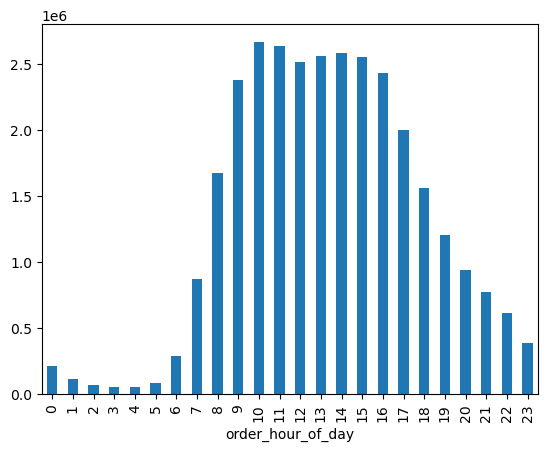

In [30]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [31]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'Entire_BusiestHourOfDay.png'))

### 9- Defining TOP products 

In [32]:
df18=df[['product_name','product_id','prices']]

In [33]:
df18

,product_name,product_id,prices
0,Soda,196,9.0
1,Clementines,6184,4.3
2,0% Greek Strained Yogurt,38928,12.6
3,,0,0.0
4,Organic Diced Tomatoes,890,4.9
...,...,...,...
6464349,Chicken Carbonara,32019,13.2
6464350,Wild Blueberry Muffin & Quick Bread Mix,44678,12.1
6464351,Fresh Mint Toothpaste,44801,1.5
6464352,Favorites Super Moist Butter Recipe Yellow Cak...,47115,8.6


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [34]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().head(11)

In [35]:
DF18

,product_name,prices
0,Banana,453164
1,Bag of Organic Bananas,366403
2,Organic Strawberries,255988
3,Organic Baby Spinach,231772
4,Organic Hass Avocado,206799
5,,191552
6,Organic Avocado,168267
7,Large Lemon,145397
8,Strawberries,136330
9,Limes,134751


In [36]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [38]:
DF18=DF18.drop(index=5)

#### -creating plot

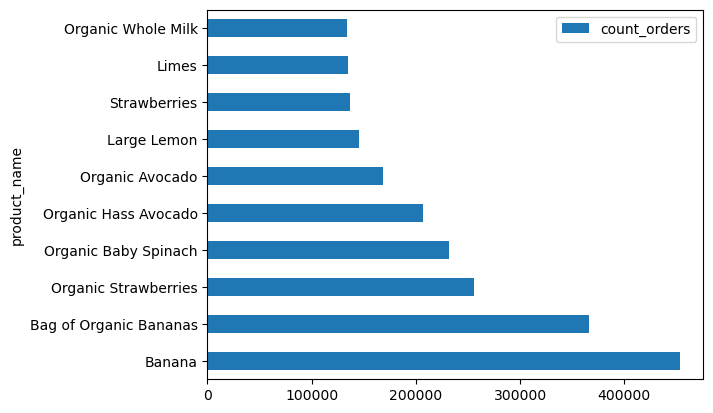

In [39]:
Bar21=DF18.plot.barh(x='product_name')

In [40]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'Entire_Products.png'))

### total amount of purshases

In [41]:
df['prices'].sum()

369873724.4000002

### 4.10-5 Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. If using the “orders_day_of_the_week” and “order_hour_of_day” columns show how they would impact customer profiles. (seeking for characteristics would lead to the profile “Single adult” or “Young parent.”)

##### 1.  Profiling characteristics: 'user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants','fam_status', 'income'  

###### 2.Variables:  'product_id', 'product_name', 'aisle_id','department_id', 'prices', 'order_id', 'eval_set', 'order_number', 'day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day', 'busiest days', 'max_order', 'loyalty_flag', 'mean_price','spender_flag', 'median_days_sinse_ord', 'frequent_flag'

#### 4.10-5 Creating profiling variables: sigle adult, young parent
#### -- analyzing which profile is more interesting as spender: grouping by different columns we can see counts that is number of orders by this group (every row corrispond to the order)
#### -- creating choosen variables adding the corrisponding flag at customer df and merging it with our db (and don't adding the flag directly to our df to avoid Memory Error)

In [ ]:
df_short=df[['user_id', 'Gender', 'STATE', 'Age',
        'date_joined', 'n_dependants','fam_status', 'income', 'loyalty_flag']].copy()

#### --analyzing customers by fam_status

In [ ]:
df_short.groupby(['Gender']).value_counts(['fam_status'])

In [ ]:
df_short.groupby(['Gender']).value_counts(['fam_status', 'n_dependants'])

#### Creating the plot to show Gender-Fam_status-N_dipendants correlation

In [ ]:
df1=df_short[['user_id','fam_status','loyalty_flag']]

In [ ]:
df11=df1.drop_duplicates().reset_index()

In [ ]:
df11

In [ ]:
bar111=df11.groupby('fam_status')['loyalty_flag'].value_counts().unstack().plot.barh()

In [ ]:
bar111.figure.savefig(os.path.join(path,'Prepared Data', 'Intire_Fam-LoyaltyFlag.png'))

#### saving plot

In [ ]:
bar.figure.savefig(os.path.join(path,'Prepared Data', 'Gender-Fam-Dependants.png'))

In [ ]:
bar=df_short.groupby(['Gender']).value_counts(['fam_status', 'n_dependants']).plot.bar(color=['magenta','magenta','magenta','magenta','magenta','magenta','magenta','magenta','blue','blue','blue','blue','blue','blue','blue','blue'])

#### saving the plot

In [ ]:
bar.figure.savefig(os.path.join(path,'Prepared Data', 'Gender-Fam-Dependants.png'))

#### Creating the plot to show Prices-Fam_status-N_dipendants correlation

In [ ]:
bar=df.groupby(['fam_status','n_dependants'])['prices'].mean().plot.bar()

In [ ]:
bar.figure.savefig(os.path.join(path,'Prepared Data', 'Entire_Prices-Fam-Dependants.png'))

In [ ]:
df.groupby(['fam_status','n_dependants'])['prices'].mean()

#### Creating the plot to show Prices-Fam_status-N_dipendants correlation

In [ ]:
df.groupby(['Gender'])['prices'].mean()

In [ ]:
df['prices'].sum()

In [27]:
df.groupby(['Gender'])['prices'].mean().to_clipboard()

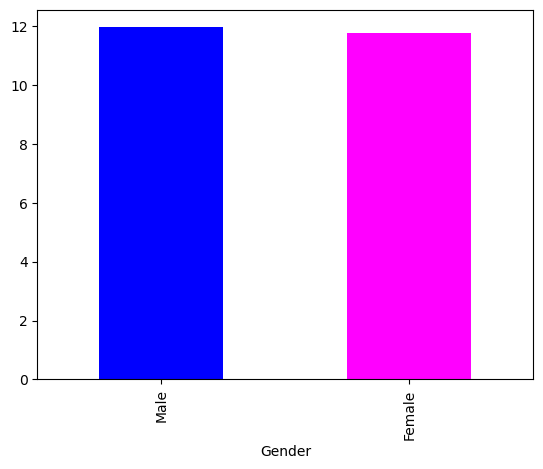

In [24]:
bar=df.groupby(['Gender'])['prices'].mean().sort_values(ascending=False).plot.bar(color=['blue','magenta'])


In [26]:
bar.figure.savefig(os.path.join(path,'Prepared Data', 'Entire_Gender_MeanPrice.png'))

#### As the data shows married male and female customers order number is simile independent of presence of children or number of dependants. 

#### as we know from scatterplot from 4.9-2-2 that income is more by customer after 40 years old we can make the flag like "young age" <=40 and mature age >40; base_consumer <=200,000 $ advanced_consumer>200,000$ and <400,000$, investor>=400,000$, 

In [ ]:
df10=pd.read_csv(os.path.join(path,'Original Data','customers.csv'))

In [ ]:
df11=df10[['user_id','Age', 'income']]

In [ ]:
df11.head

### Defining flag

In [ ]:
df11.loc[(df11['Age']<=40)&(df11['income']<=200000),
          'AgeIncome_flag']='young base_consumer'

In [ ]:
df11.loc[(df11['Age']<=40)&(df11['income']>200000)&(df11['income']<400000),
          'AgeIncome_flag']='young advanced_consumer'

In [ ]:
df11.loc[(df11['Age']<=40)&(df11['income']>=400000),
          'AgeIncome_flag']='young investor'

In [ ]:
df11.loc[(df11['Age']>40)&(df11['income']<=200000),
          'AgeIncome_flag']='mature base_consumer'

In [ ]:
df11.loc[(df11['Age']>40)&(df11['income']>200000)&(df11['income']<400000),
          'AgeIncome_flag']='mature advanced_consumer'

In [ ]:
df11.loc[(df11['Age']>40)&(df11['income']>=400000),
          'AgeIncome_flag']='mature investor'

In [ ]:
df11.loc[df11['income'] == 'NaN','AgeIncome_flag']='not defined'

### Application flag

In [ ]:
df11['AgeIncome_flag'].value_counts(dropna=False)

### Adding the flag to df

### Deviding df to 3 random sample parts

In [ ]:
np.random.seed(4)
dev=np.random.rand(len(df))<=0.7

#### sroring 30% of sample in df small

In [ ]:
small=df[~dev]

#### storing 70% of sample in df big

In [ ]:
big=df[dev]

#### Deviding big to 3 df

In [ ]:
np.random.seed(4)
dev=np.random.rand(len(big))<=0.5

In [ ]:
small_2=big[~dev]

In [ ]:
small_3=big[dev]

#### Merging partial df with df11 containing flag

In [ ]:
small_merged=pd.merge(small, df11, on=['user_id','Age', 'income'])

In [ ]:
small_2_merged=pd.merge(small_2, df11, on=['user_id','Age', 'income'])

In [ ]:
small_3_merged=pd.merge(small_3, df11, on=['user_id','Age', 'income'])

#### exporting partial df for concatenate them later to avoid memory error

In [ ]:
small_merged.to_pickle(os.path.join(path,'Prepared Data', 'AgeIncome_1_merged.pkl'))

In [ ]:
small_2_merged.to_pickle(os.path.join(path,'Prepared Data', 'AgeIncome_2_merged_flag.pkl'))

In [ ]:
small_3_merged.to_pickle(os.path.join(path,'Prepared Data', 'AgeIncome_3_merged.pkl'))